# Exploración y clasificación del Glass Dataset en Python
#### Por: Tomás Garzón Gómez, Daniel Garzón Fraile, Santiago Villota Alava 

### Exploración del Dataset

In [136]:
#Librerias a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [121]:
glass = pd.read_csv('glass.cvs')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [122]:
print(glass.shape)

(214, 10)


In [123]:
print(glass.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [124]:
print(glass.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


### Propiedades del Dataset

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


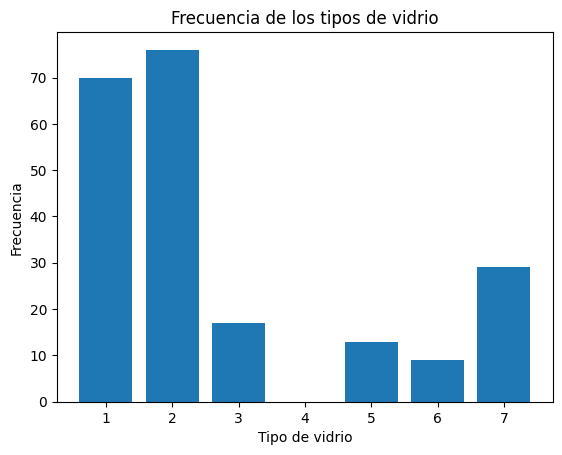

In [125]:
freq_type = glass['Type'].value_counts()
print(freq_type)
plt.title('Frecuencia de los tipos de vidrio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=10)
plt.xlabel('Tipo de vidrio', fontsize=10)
plt.bar(freq_type.index, freq_type.values)
plt.show()

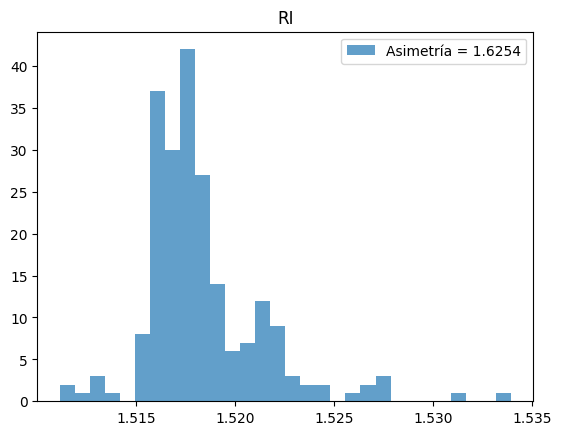

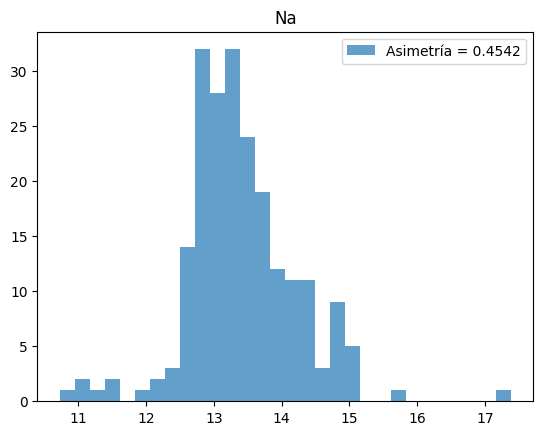

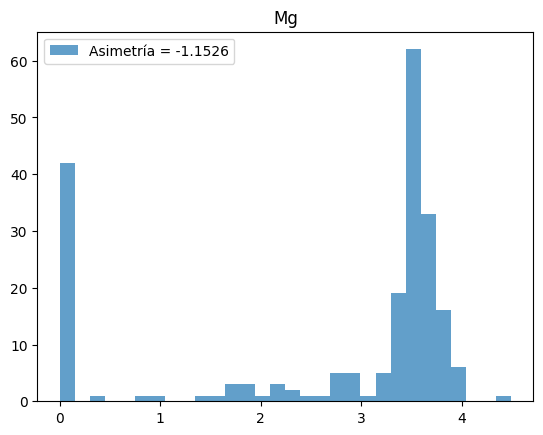

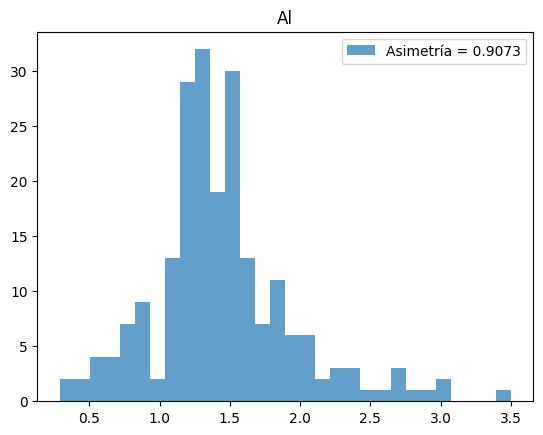

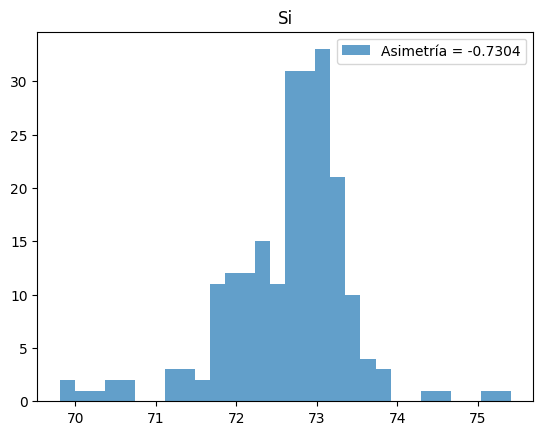

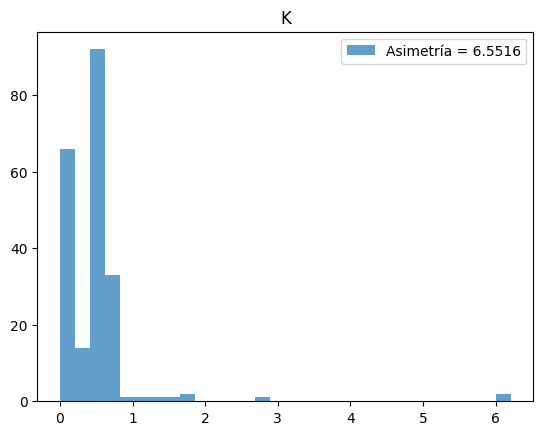

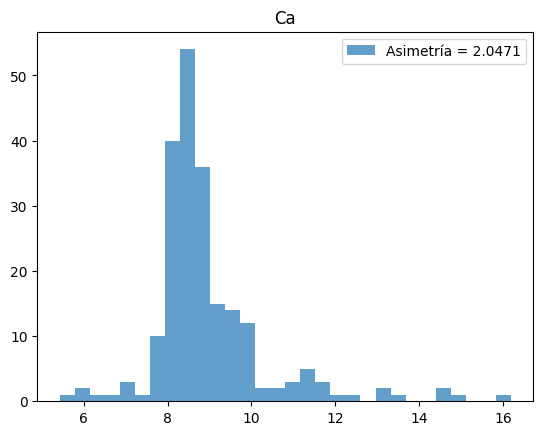

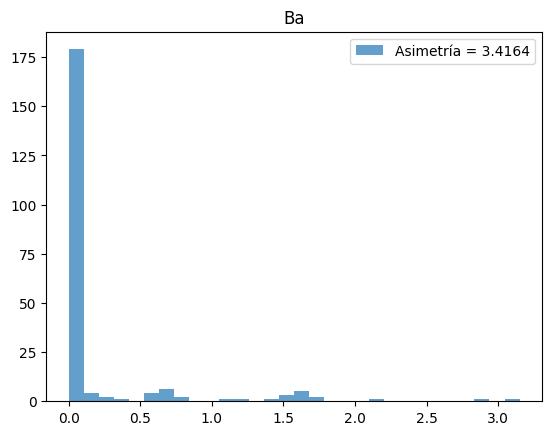

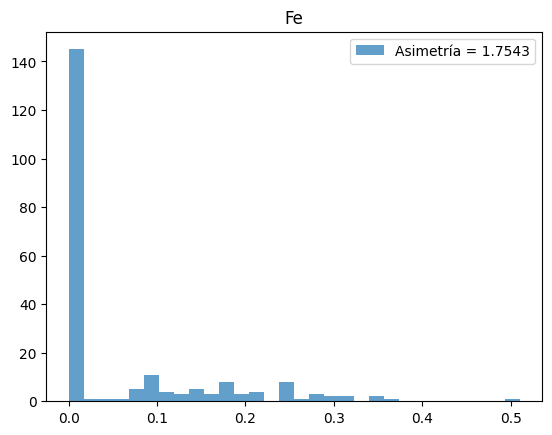

In [126]:
for feat in glass.columns:
  if feat != 'Type':
    skew = glass[feat].skew()
    plt.title(f'{feat}')
    plt.hist(glass[feat], bins=30, label=f'Asimetría = {skew:.4f}', alpha=0.7)
    plt.legend()
    plt.show()

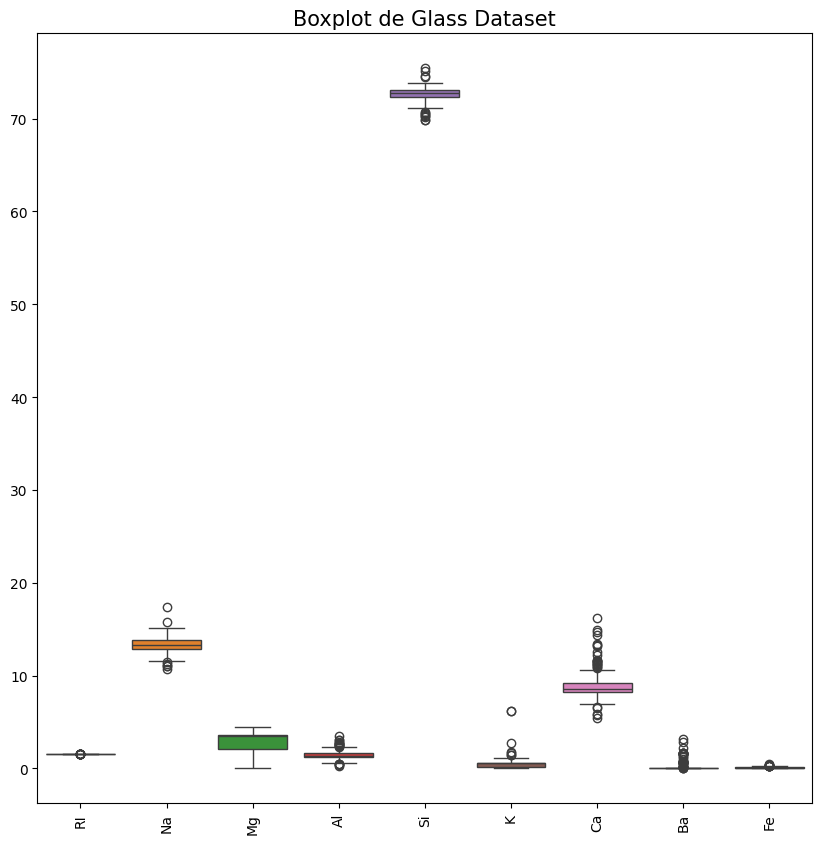

In [127]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=glass[glass.columns[:-1].tolist()])
plt.title('Boxplot de Glass Dataset', fontsize=15)
plt.xticks(rotation=90) 
plt.show()

In [128]:
def identify_outliers(df):
  outliers = []
  for col in df.columns.tolist():
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_list = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index  
    outliers.extend(outliers_list)
  outliers.sort()
  outliers_count = {}
  for i in range(len(outliers)):
    if outliers_count.get(outliers[i]) is not None:
      outliers_count[outliers[i]] += 1
    else:
      outliers_count[outliers[i]] = 1 

  atypical = []
  for key, value in outliers_count.items():
    if value > 2:
      atypical.append(key)



  return atypical 

print(identify_outliers(glass[glass.columns[:-1].tolist()]))


[103, 105, 106, 107, 110, 111, 163, 171, 172, 184, 185, 186, 189, 207]


<Figure size 1000x1000 with 0 Axes>

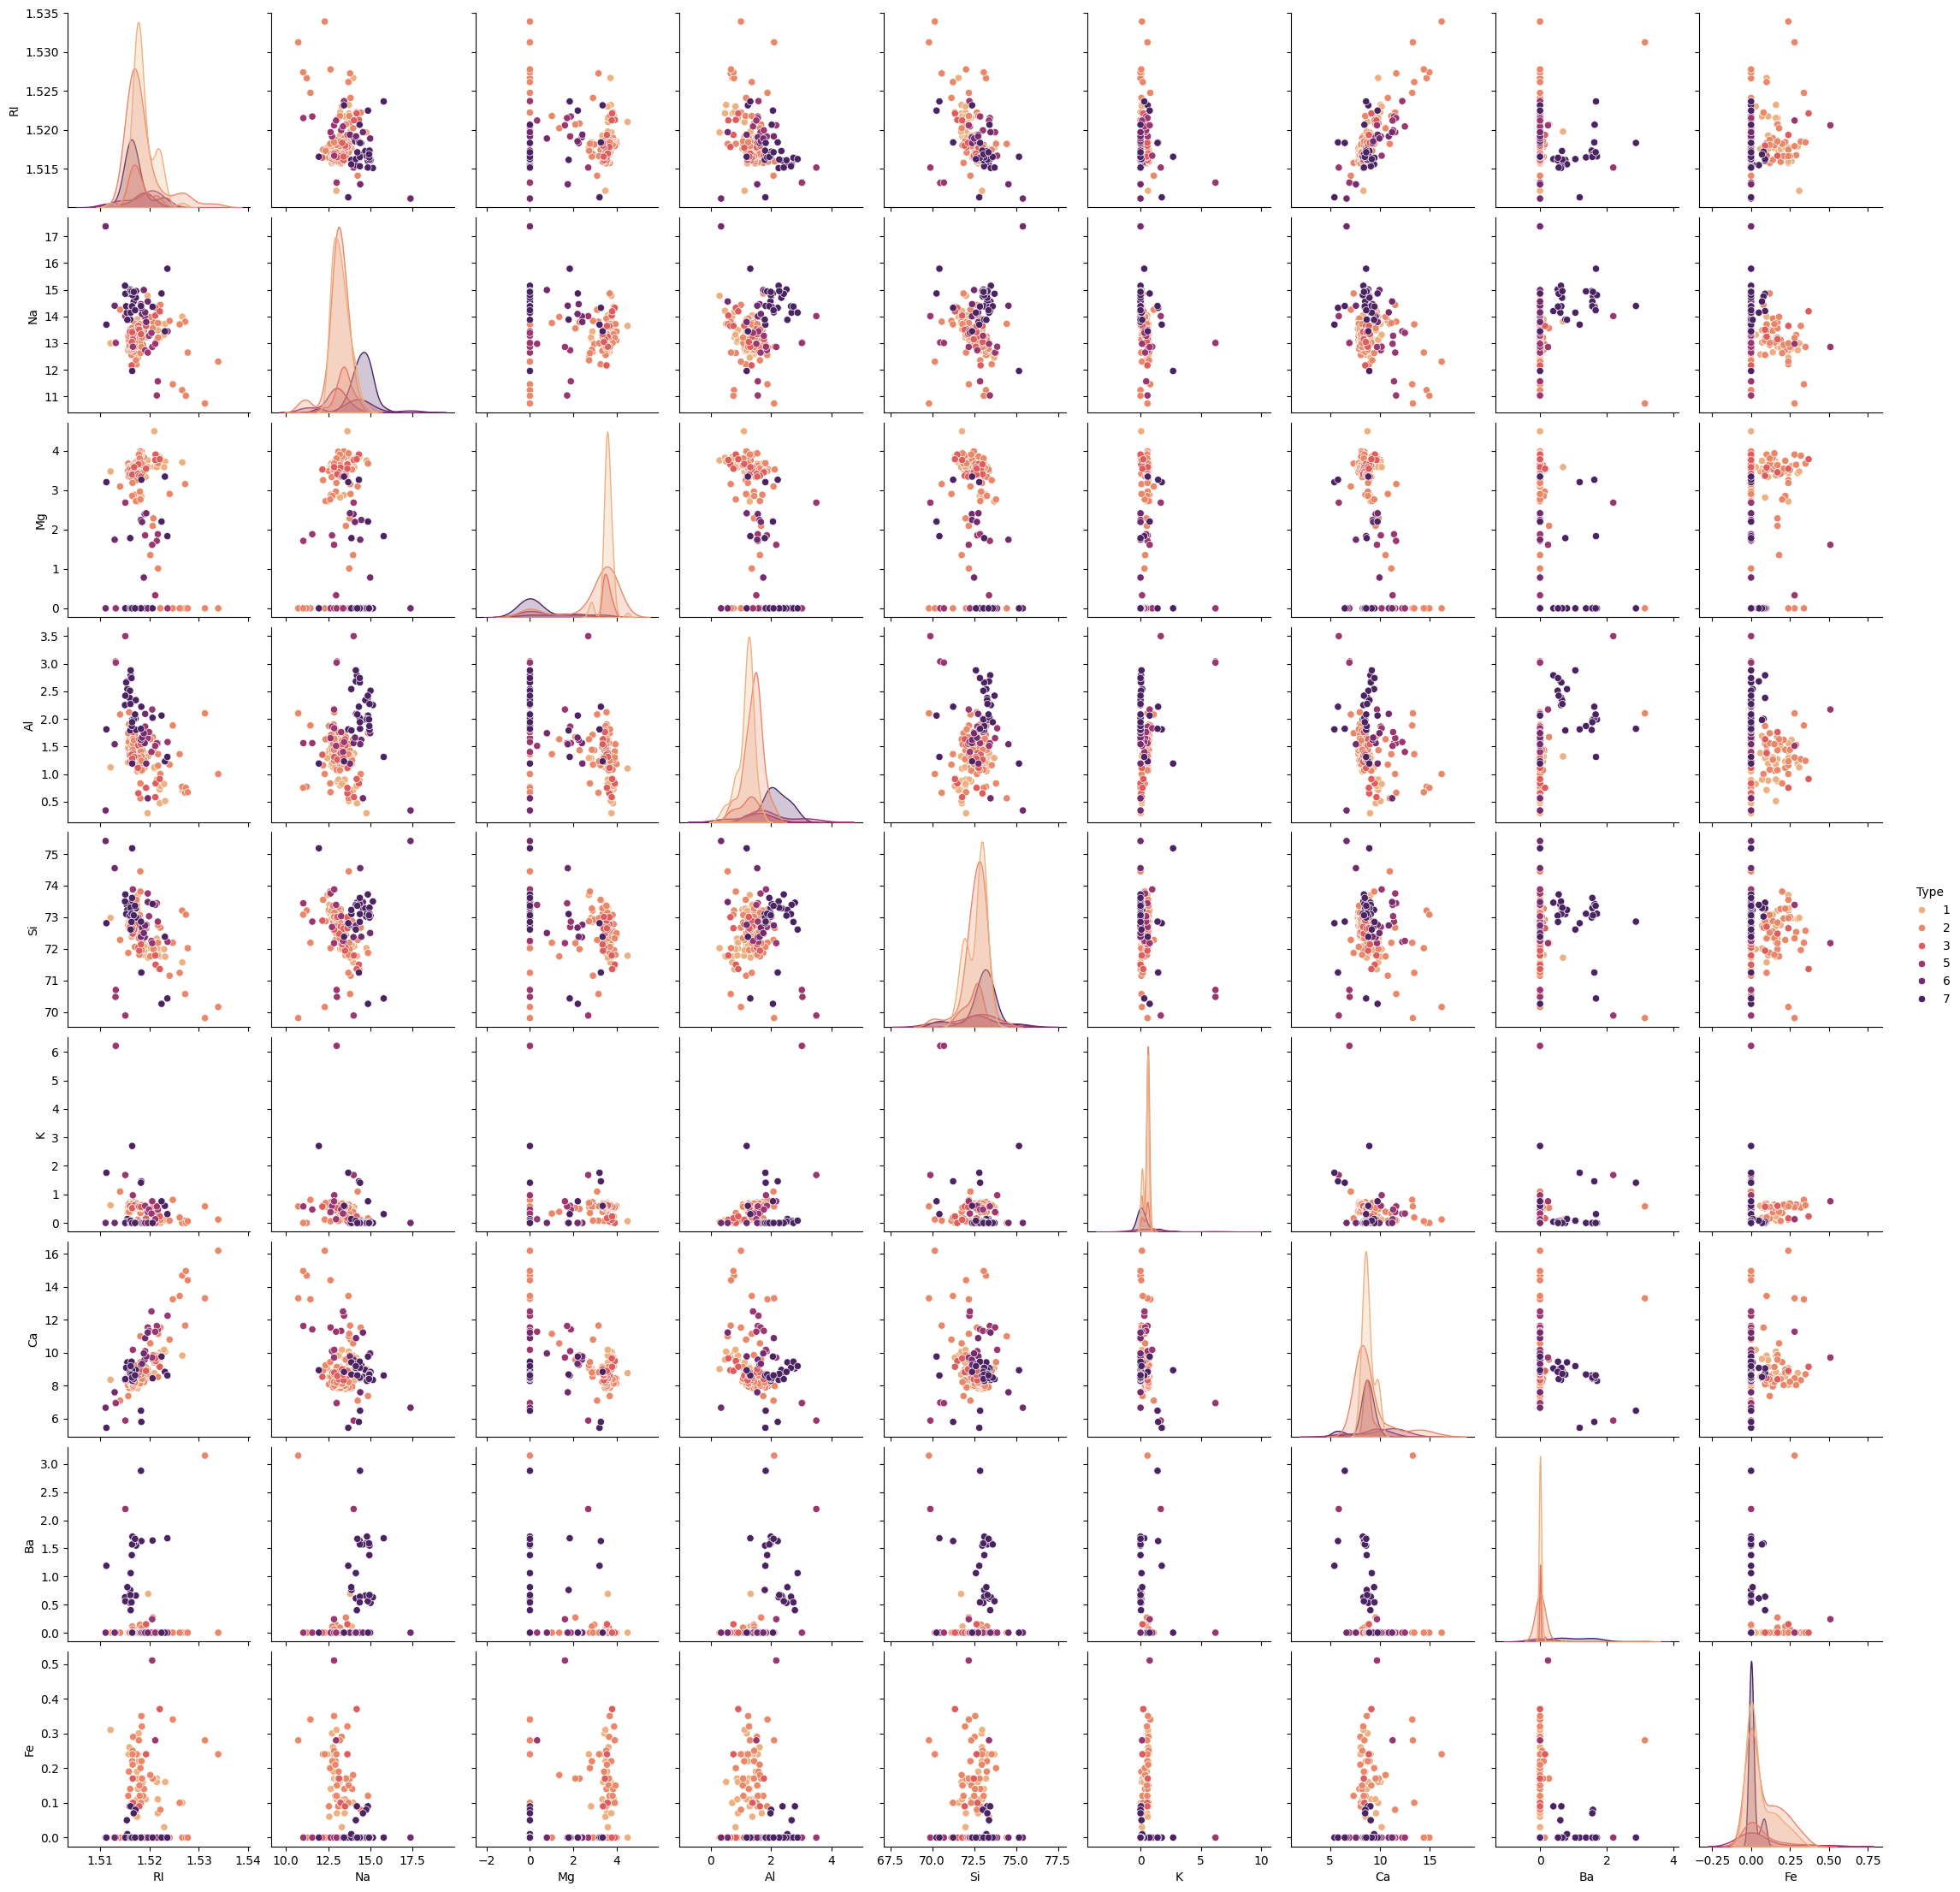

In [129]:
plt.figure(figsize=(10, 10))
sns.pairplot(glass,  hue='Type', palette='flare')
plt.show()

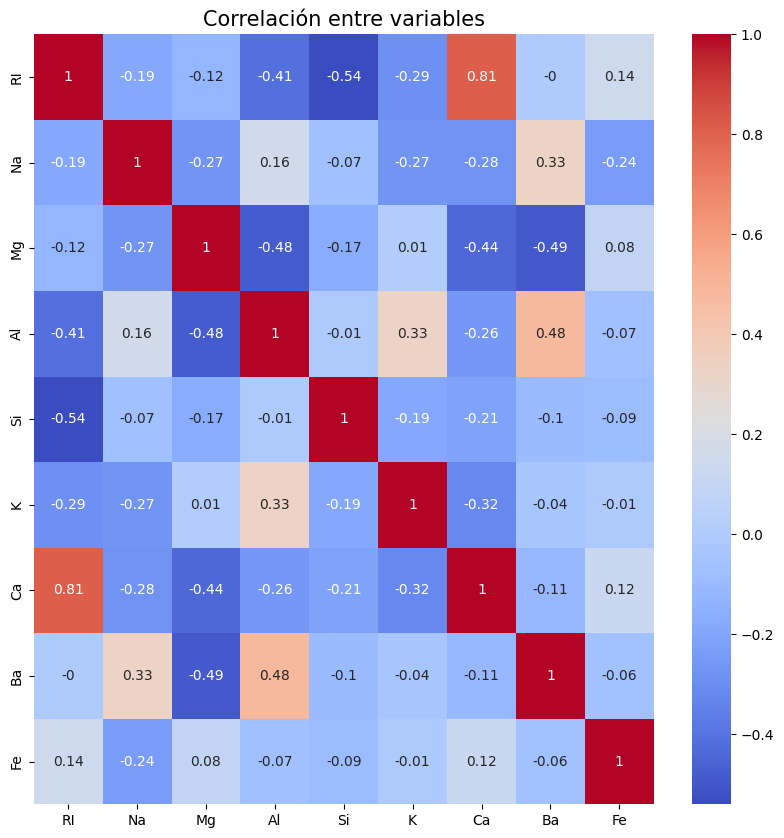

In [130]:
matrix = glass[glass.columns[:-1].tolist()].corr().round(2)
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables', fontsize=15)
plt.show()

### Preparación de los datos

In [131]:
glass.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


(200, 10)


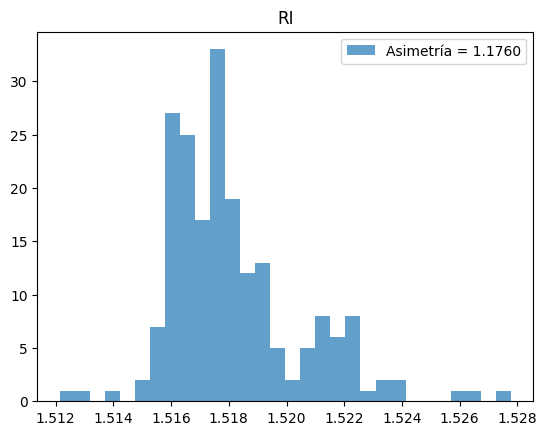

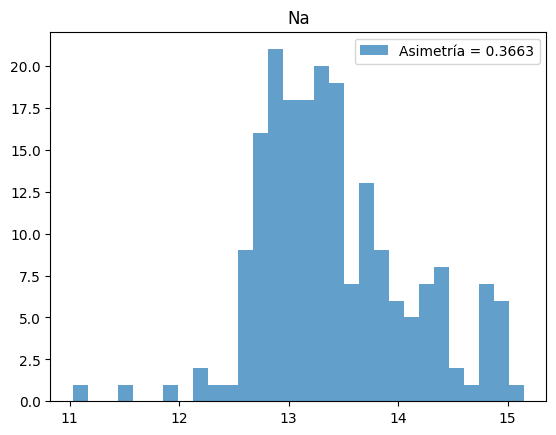

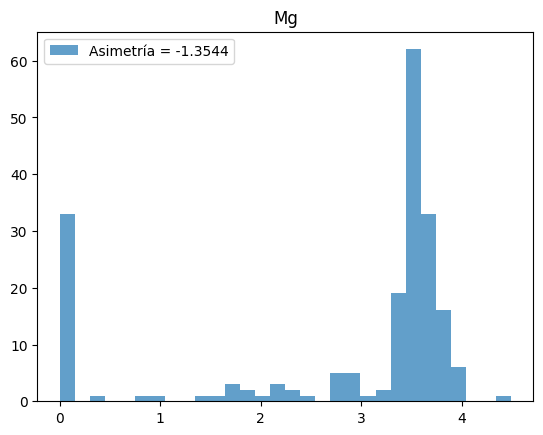

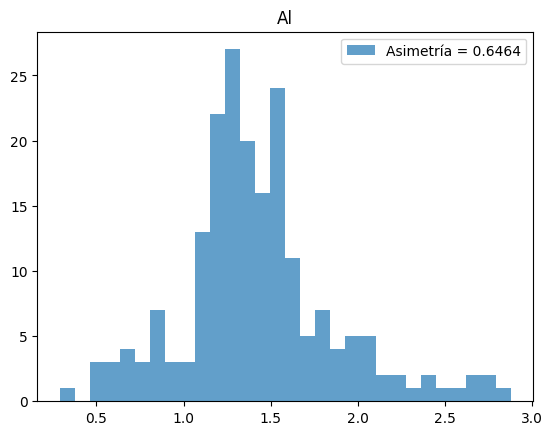

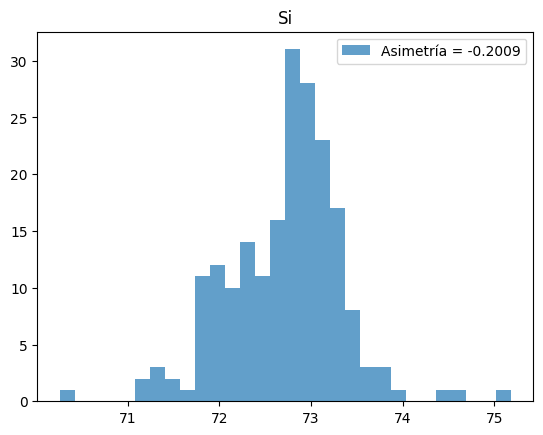

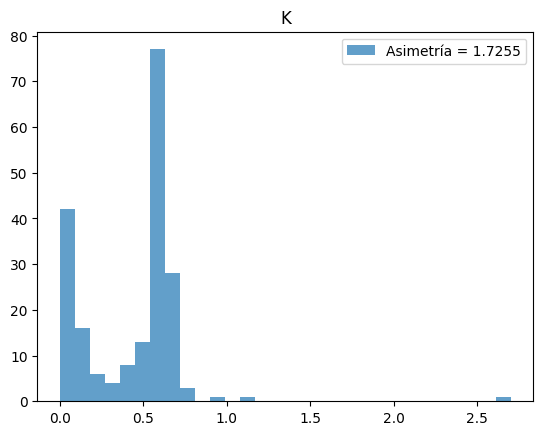

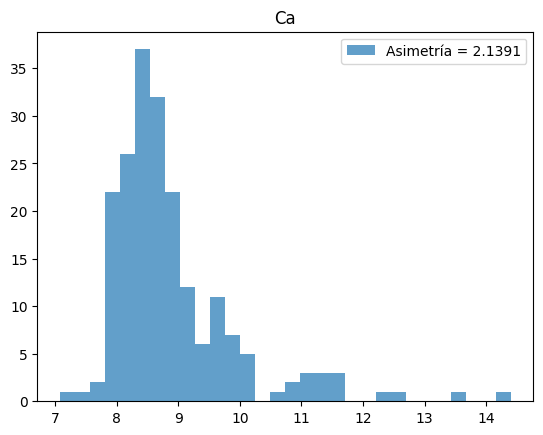

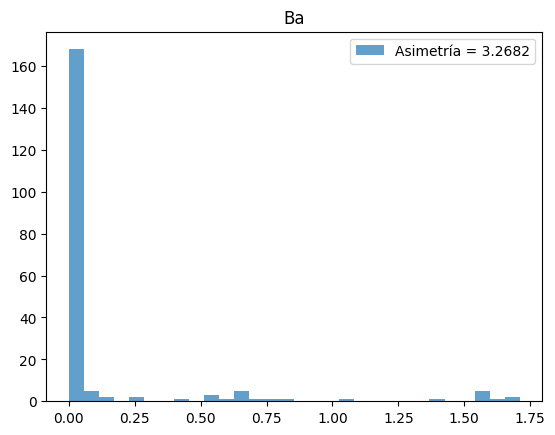

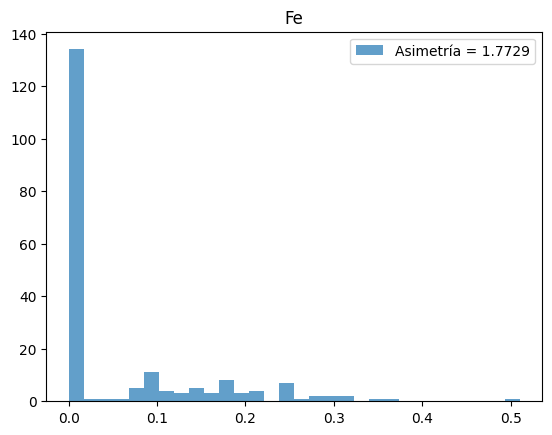

In [132]:
outliers = identify_outliers(glass[glass.columns[:-1].tolist()])
glass_clean = glass.drop(outliers)
print(glass_clean.shape)
for feat in glass_clean.columns:
  if feat != 'Type':
    skew = glass_clean[feat].skew()
    plt.title(f'{feat}')
    plt.hist(glass_clean[feat], bins=30, label=f'Asimetría = {skew:.4f}', alpha=0.7)
    plt.legend()
    plt.show()

In [133]:
glass_clean.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,1.518173,13.41575,2.801850,1.424950,72.722250,0.428700,8.90035,0.123650,0.056700,2.670000
std,0.002335,0.69161,1.370908,0.444292,0.620959,0.304392,1.03586,0.362892,0.095718,2.054802
min,1.512150,11.03000,0.000000,0.290000,70.260000,0.000000,7.08000,0.000000,0.000000,1.000000
25%,1.516545,12.93000,2.635000,1.190000,72.355000,0.130000,8.27750,0.000000,0.000000,1.000000
50%,1.517650,13.30000,3.495000,1.360000,72.820000,0.550000,8.60000,0.000000,0.000000,2.000000
75%,1.519060,13.79500,3.610000,1.612500,73.100000,0.600000,9.14000,0.000000,0.100000,3.000000
max,1.527770,15.15000,4.490000,2.880000,75.180000,2.700000,14.40000,1.710000,0.510000,7.000000


In [ ]:
boxcox_features = []
for feat in glass_clean.columns:
  if feat != 'Type':
    fitted_data, fitted_lambda = stats.boxcox(glass_clean[feat]+1)
    boxcox_features.append(fitted_data)

boxcox_features = np.array(boxcox_features).T
glass_clean_boxcox = pd.DataFrame(boxcox_features, columns=glass_clean.columns[:-1])
glass_clean_boxcox['Type'] = glass_clean['Type']

In [143]:
glass_clean_boxcox.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,200.0000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,200.000000,187.000000
mean,0.0029,0.910643,14.813499,0.955244,6.067051e+09,0.342872,1.999249e-01,0.013377,0.019141,2.368984
std,0.0000,0.003076,8.011922,0.217702,2.873462e+08,0.213507,8.577975e-07,0.031188,0.027757,1.765165
min,0.0029,0.897962,0.000000,0.261374,5.004570e+09,0.000000,1.999215e-01,0.000000,0.000000,1.000000
25%,0.0029,0.908540,10.569802,0.850076,5.893107e+09,0.122922,1.999244e-01,0.000000,0.000000,1.000000
50%,0.0029,0.910269,18.555032,0.938477,6.106934e+09,0.447403,1.999248e-01,0.000000,0.000000,2.000000
75%,0.0029,0.912445,19.835861,1.060851,6.238738e+09,0.480536,1.999254e-01,0.000000,0.051652,2.500000
max,0.0029,0.917711,31.408315,1.561947,7.293050e+09,1.392148,1.999271e-01,0.091142,0.068796,7.000000


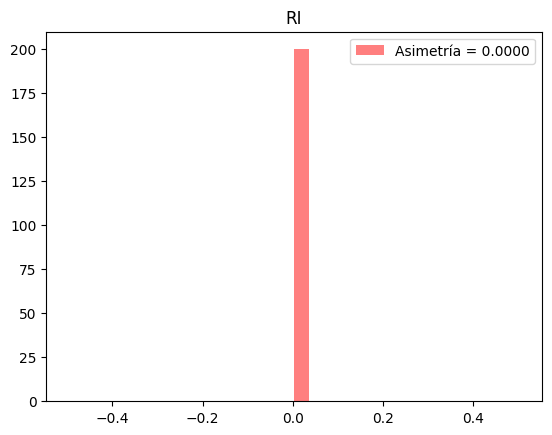

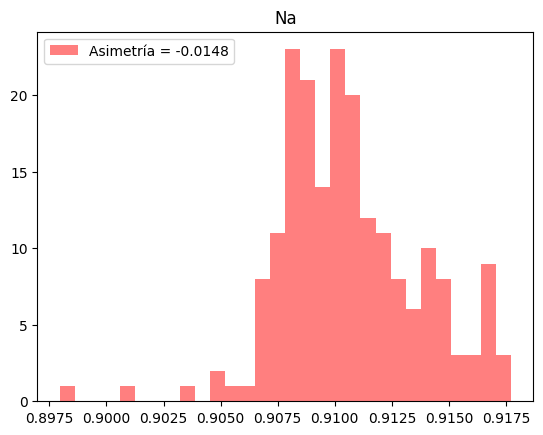

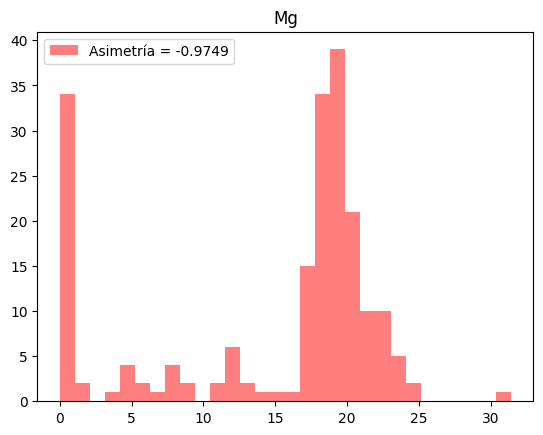

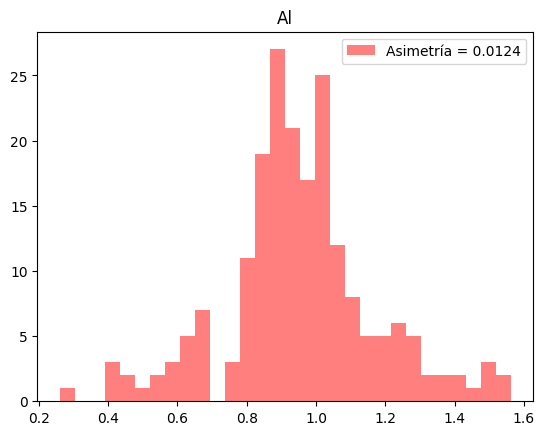

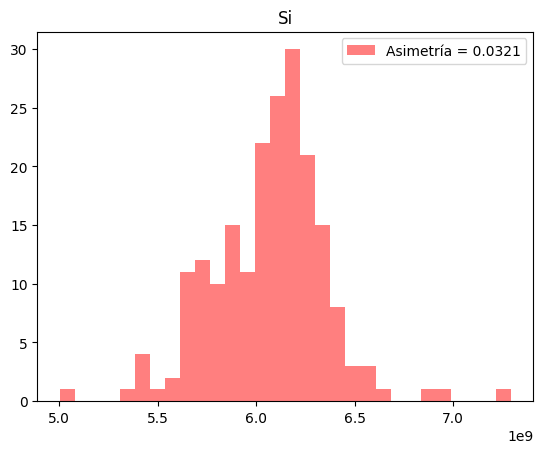

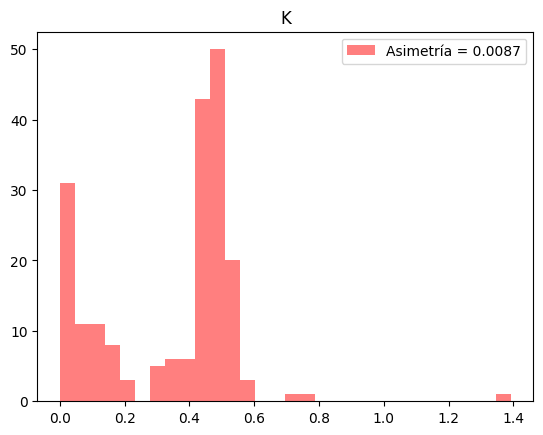

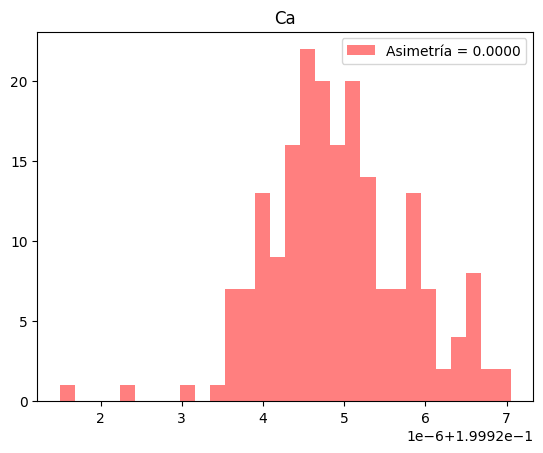

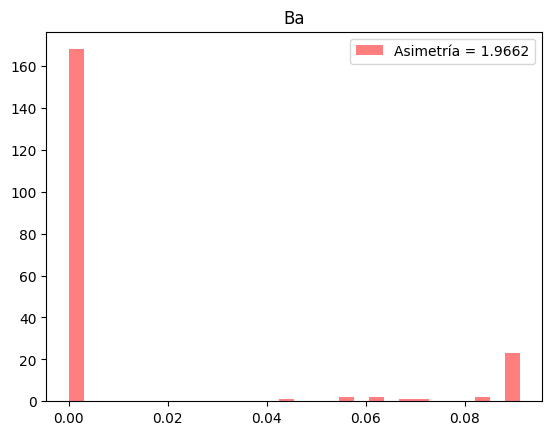

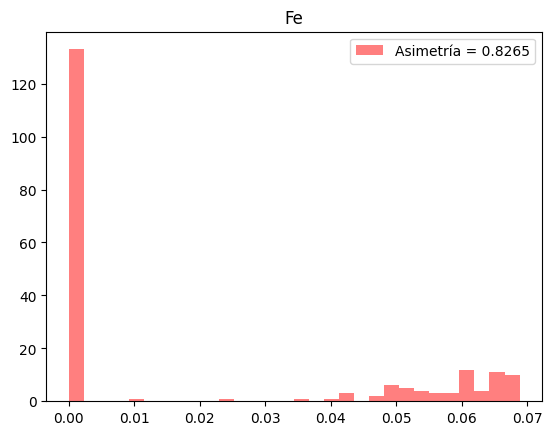

In [ ]:
for feat in glass_clean_boxcox.columns:
  if feat != 'Type':
    skew = glass_clean_boxcox[feat].skew()
    plt.title(f'{feat}')
    plt.hist(glass_clean_boxcox[feat], bins=30, label=f'Asimetría = {skew:.4f}',
              alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [ ]:
for feat in glass_clean_boxcox.columns:
  if feat != 'Type':
    delta = np.abs(glass_clean_boxcox[feat].skew() - glass_clean_boxcox[feat].skew())
    if delta < 1.0:
      print(f'{feat} es menos asimétrica, después de aplicar Box-Cox')
    else:
      print(f'{feat} es más asimétrica, después de aplicar Box-Cox')

RI es menos asimétrica
Na es menos asimétrica
Mg es menos asimétrica
Al es menos asimétrica
Si es menos asimétrica
K es menos asimétrica
Ca es menos asimétrica
Ba es menos asimétrica
Fe es menos asimétrica


### Evaluación de Algoritmos

##### Algortimo \#1

##### Algoritmo #2

##### Algoritmo #3

##### Algoritmo #4

### Análisis y comparación de algoritmos

### Prueba final con algoritmo x sobre todo el set de datos